<div style="border:solid green 2px; padding: 20px">

<b>Привет! Поздравляю с выполнением очередного проекта!</b>

Меня зовут Петр Раздобреев и я буду проверять твою работу. Попробую помочь сделать тебе её еще лучше! В Практикуме принято общени на ты, но если это дискомфортно, то сообщи об этом)

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ Так выделены небольшие замечания.Такие замечания в проекте допустимы, это пространство для улучшений в будущем.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Так я выделяю успешные идеи.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    



### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np


sessions = pd.read_csv('/datasets/visits_info_short.csv')
orders= pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

#Общая информация о данных
col = [sessions,orders,costs]
for t in col:
    print(t.info())

sessions.rename(columns = {'User Id' : 'user_id', 'Region' : 'region','Channel' : 'channel', 'Session Start' : 'session_start', 'Session End' : 'session_end','Device':'device'}, inplace = True)
orders.rename(columns = {'User Id' : 'user_id', 'Event Dt' : 'event_dt', 'Revenue' : 'revenue'}, inplace = True)
costs.rename(columns = {'Channel' : 'channel'}, inplace = True)


# изменям тип данных у дат/времени
sessions['session_start'] = pd.to_datetime(sessions['session_start'])
sessions['session_end'] = pd.to_datetime(sessions['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

#visits.head()
#orders.head()
#costs.head()

# Проверка на пропуски и дубликаты

for i in col:
    print(i.isna().sum())
    print(i.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #  

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Перед отправкой лучше нажимать `Kernel`/`Restart & Run All`, чтобы исключить возможность казусов с незапуском каких-то ячеек.  </div>


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 
    
* Проблема названий столбцов ведь только в том, что имеются пробелы и заглавные буквы, соответственно можно было бы обойтись и без `rename`
* Могу предложить такой вариант `visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]`
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Ты многократно писал очень схожие куски кода, но можно ведь сделать функции для первичного анализа датафреймов, смотреть распределение численных значений при помощи `describe`, анализировать какие строки наиболее частые при помощи `value_counts`, ну и `head` с `info` в эту же функцию первичного анализа стоит поместить, и при помощи нее можно получать первоначальную информацию о каждом датасете по вызову функции к каждому новому датасету, ну и такую функцию переносить из проекта в проект, чтобы максимально упрощать себе первичный анализ и оставлять больше сил и времени на исследования). 
    
Безусловно в этом проекте нет необходимости в глубоком анализе данных, но например можно добавить переименование столбцов в неё
</div>

**Для удобства было принято решение переназвать колонки в данных. Изменили тип данных у дат/времени с object на datetime. Проверка на пропуски и дубликаты не выявила аномалий. В данных очень много текстовых обозначений, доходы и расходы даны в десятичном виде.**

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [2]:
# функция для профилей пользователей
def get_profiles_2(sessions, orders, ad_costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

In [3]:
def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
    # решаем какие столбцы оставим для группировки удержания, столбец признака платящего пользователя остается всегда
    dimensions = ['payer'] + dimensions
    
    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта 
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # формируем массив сырых данных
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим "треугольную таблицу" 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к треугольной таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждый из столбцов на размер когорты - расчитываем % удержания (retention rate)
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result['cohort_size'] = cohort_sizes                                                                     # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        return result
    
    # расчитываем удержание 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # рассчитываем удержание по всем параметрам + дата
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы удержания и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [4]:
# функция для расчёта LTV и ROI
def get_ltv_2(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions_2(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions_2(
        result_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions_2(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [5]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [6]:
def plot_retention(retention, retention_history, horizon):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержания первого дня
    retention = retention.drop(columns=['cohort_size', 0])

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon-1, aggfunc='mean'
    ).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey = ax3)
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    ).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # исключаем наложение графиков друг на друга
    plt.tight_layout()

    plt.show()

In [7]:
#функция для графика конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#conversion_raw, conversion, conversion_history = get_conversion(
   # profiles_big,
   # orders_big,
    #datetime(2018, 1, 1).date(),
    #7,
    #dimensions=['channel'],
#)
#plot_conversion(conversion, conversion_history, 7)

In [8]:
#функция для графиков ltv и roi
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
        
Все необходимые функции были заданы, можно приступать к анализу. В принципе можно было добавить `markdown` заголовков, чтобы разграничить функции и упростить поиск нужной

</div>

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [9]:

profiles = get_profiles_2(sessions, orders, costs)
min_date=pd.to_datetime(profiles['first_ts']).dt.date.min()
max_date= pd.to_datetime(profiles['first_ts']).dt.date.max()
print('Минимальная дата прилечения:',min_date)
print('Максимальная дата прилечения:',max_date)

Минимальная дата прилечения: 2019-05-01
Максимальная дата прилечения: 2019-10-27


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* Отлично, что проверили корректность временного интервала. Соответствует ли этот период указанному в задании? Хотелось бы в проекте видеть акцент на этом моменте. 
* В принципе нет необходимости в дополнительных переменных, ведь ты их используешь однократно и можно прям в `print` рассчитать эти значения 
</div>

**Минимальная дата прилечения: 2019-05-01 // Максимальная дата прилечения: 2019-10-27**


**Мы имеем данные почти за полгода. На последнем шаге дата анализа будет 1 ноября 2019 года, которая не входит в данный интервал.**

In [10]:
print('Таблица, отражающая количество пользователей и долю платящих из каждой страны')

r1=profiles.groupby('region').agg({'user_id':'nunique','payer':'mean'}).sort_values(by='payer', ascending=False)
r1['clients']=r1['user_id']*r1['payer']
r1.sort_values(by='clients', ascending=False)

Таблица, отражающая количество пользователей и долю платящих из каждой страны


,user_id,payer,clients
region,,,
United States,100002,0.069019,6902.0
UK,17575,0.039829,700.0
France,17450,0.037994,663.0
Germany,14981,0.041119,616.0


**Пользователи приходят в приложение из США, Германии, Великобритании и Франции. На США приходится больше всего платящих пользователей. Худший показатель по объему платящих пользователей у Германии, однако их внутренняя доля уступает лишь США.**

In [11]:

print('Таблица, отражающая количество пользователей и долю платящих для каждого устройства')
d1=profiles.groupby('device').agg({'user_id':'nunique','payer':'mean'}).sort_values(by='payer', ascending=False)

d1['clients']=d1['user_id']*d1['payer']
d1.sort_values(by='clients', ascending=False)

Таблица, отражающая количество пользователей и долю платящих для каждого устройства


,user_id,payer,clients
device,,,
iPhone,54479,0.062079,3382.0
Android,35032,0.058518,2050.0
Mac,30042,0.063644,1912.0
PC,30455,0.050468,1537.0


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
    
* Старайся округлять числа, чтобы у них не было таких длинных хвостов, есть любопытный способ, который позволяет облагородить вывод в частности и дробей - `style.format`, начать читать про него можно <a href='https://habr.com/ru/post/521894/'>тут</a>

* Очень схожие действия для построения агрегации по странам, каналам, устройствам, рекомендую сделать для этого функцию и сократить количество схожих строчек кода.

</div>

**Клиенты пользуются Mac, iPhone, Android и PC устройствами. Платящие пользователи предпочитают Android и iPhone. PC замыкает рейтинг. Однако у Mac самая большая доля платящих пользователей.**

In [12]:

print('Таблица, отражающая количество пользователей и долю платящих для каждого канала')
c1=profiles.groupby('channel').agg({'user_id':'nunique','payer':'mean'}).sort_values(by='payer', ascending=False)

c1['clients']=c1['user_id']*c1['payer']
c1.sort_values(by='clients', ascending=False)

Таблица, отражающая количество пользователей и долю платящих для каждого канала


,user_id,payer,clients
channel,,,
FaceBoom,29144,0.122049,3557.0
TipTop,19561,0.096007,1878.0
organic,56439,0.020553,1160.0
WahooNetBanner,8553,0.052964,453.0
AdNonSense,3880,0.113402,440.0
RocketSuperAds,4448,0.079137,352.0
LeapBob,8553,0.030633,262.0
OppleCreativeMedia,8605,0.027077,233.0
lambdaMediaAds,2149,0.104700,225.0


**Рекламные источники привлечения включают в себя: 'FaceBoom' 'organic' 'AdNonSense' 'YRabbit' 'MediaTornado'
 'RocketSuperAds' 'LeapBob' 'TipTop' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds. Больше всего платящих пользователей пришо из FaceBoom и Tip Top, а меньше всего из MediaTornado и YRabbit.**


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    


В целом в данном разделе был проведен хороший анализ данных, хотелось бы чуть распространеннее промежуточный вывод, например:
 - Мы посмотрели на базовые значения конверсии пользователей в покупатели по регионам, устройствам и каналу привлечения;
 -  Определили основной рынок. Получается, что больше всего приходит пользователей из США и они лучше других конвертируется;
 - При этом большая часть пользователей заходит с мобильных устройств, это тоже стоит отметить;
 - Также, мы можем сказать, что наибольшую конверсию имеют пользователи, которые пользуются Mac, а затем следуют пользователи iPhone, т.е. мы можем сказать, что в целом пользователи Apple имеют лучшую конверсию в покупателей. 

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [13]:
print('Общая сумма рекламных расходов:', costs['costs'].sum())

Общая сумма рекламных расходов: 105497.30000000002


**Суммарно на рекламу было потрачено более 105 000.**

In [14]:
print('Таблица, отражающая сколько денег потратили на каждый источник')
print(costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False))

Таблица, отражающая сколько денег потратили на каждый источник
                       costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22


**Больше всего рекламных расходов ушло на TipTop и FaceBoom, меньше всего - на YRabbit и MediaTornado. Прослеживается прямая зависимость между данными о платящих пользователях.**

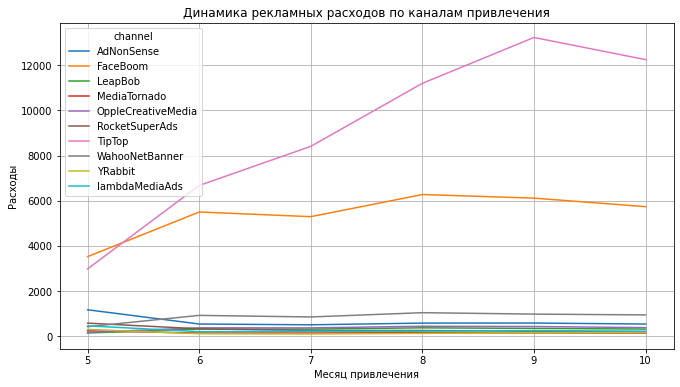

In [15]:
# строим график истории изменений рекламных расходов по каналам привлечения
costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs.pivot_table(
    index='month', columns='channel', values='costs', aggfunc='sum'
).plot(grid=True, figsize=(11, 6))
plt.ylabel('Расходы')
plt.xlabel('Месяц привлечения')
plt.title('Динамика рекламных расходов по каналам привлечения')
plt.show()

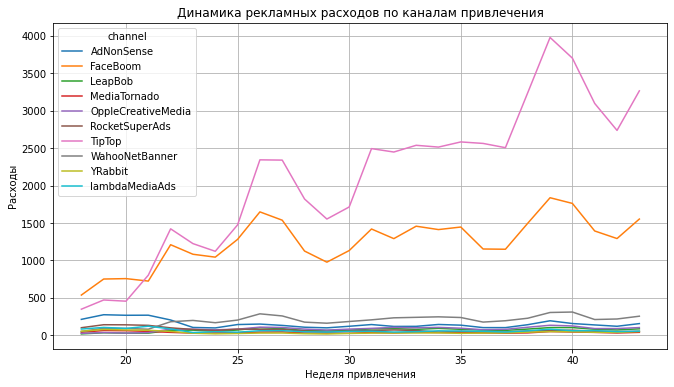

In [16]:
costs.pivot_table(
    index='week', columns='channel', values='costs', aggfunc='sum'
).plot(grid=True, figsize=(11, 6))
plt.ylabel('Расходы')
plt.xlabel('Неделя привлечения')
plt.title('Динамика рекламных расходов по каналам привлечения')
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Для того, чтобы внимательнее изучить колебания затрат по каналам можно строить несколько графиков по размеру значений, здесь это не так критично, но вообще не особо понятно, как там дела с бюджетом всех каналов кроме двух крупнейших
</div>

**В целом динамика расходов по ключевым каналам привлечения схожа, однако разнится в объемах - очень много среств с середины мая уходит на TipTop, опережающему FaceBoom. От WahooNetBanner слишком сильный отрыв у лидеров, однако до лета расходы здесь были примерно такие же, как и по AdNonSense.**

In [17]:
#CAC по источникам
profiles_2 = get_profiles_2(sessions, orders, costs)
print('CAC по каждому источнику')
print(profiles_2.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost', ascending=False))

CAC по каждому источнику
                    acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172
organic                     0.000000


**Самая высокая стоимость привлечения клиента оказалась у все тех же TipTop и FaceBoom, однако в топ-3 так же вошел AdNonSense, хотя по объему платящих клиентов данный канал привлечения замыкает топ-5 и уступает органике. На lambdaMediaAds потратили почти меньше всего денег в рекламной компании, и мы видим, что это оправдано в связи с топ-4 по CAC. Интересно, что RocketSuperAds приносит более дешевого клиента, чем WahooNetBanner, а так же опережает данный канал по доле платящих клиентов на 2%, но вложения в RocketSuperAds в разы ниже. OppleCreativeMedia имеет слабый показатель доли платящих клиентов, однако стоимость привлечения весьма низкая - 0.25. Отметим, что LeapBob хоть и имеет не особо сильный показатель доли плательщиков, приносит самого дешевого клиента. Учитывая низкие расходы на данный канал привлечения, все равно нельзя говорить о его превосходстве над аутсайдерами YRabbit и MediaTornado. Цена клиента у них также низкая, а доля плательщиков выше.**

**Таким образом, TipTop, хоть и имеет наибольшие рекламные расходы, привлекает наиболее дорогого клиента, в 2 раза уступает FaceBoom по платящим пользователям. Компании явно нужно переориентировать рекламные расходы.**

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

**Органический трафик далее учитывать не будем, так как мы не платим за этих пользователей, а доход от них может завышать довольно плачевную картину и скрыть от нас проблемы в какой-то стране или же типе устройств.**

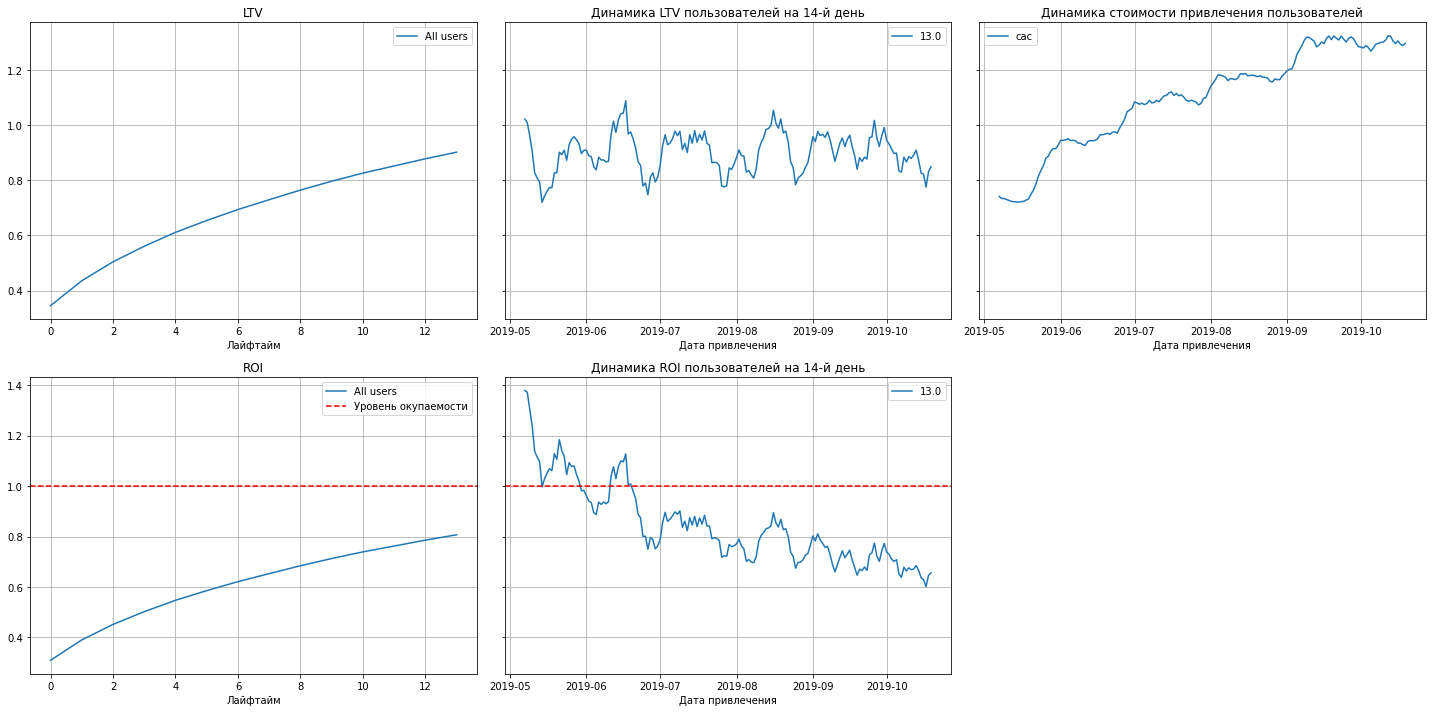

In [18]:
#исключаем органический трафик
profiles_2 = profiles_2.query('channel!="organic"')
# считаем LTV и ROI общие
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv_2(
    profiles_2, orders, datetime(2019, 11, 1).date(), 14
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14,window=7)
# графики LTV, CAC и ROI

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️
    
Здесь и ниже при анализе стоит исключать органический трафик, мы не платим за этих пользователей, а доход от них может завышать довольно плачевную картину и скрыть от нас проблемы в какой-то стране или же типе устройств. Соответственно и выводы после этих правок могут поменяться, поэтому жду исключения из дальнейшего анализа всех органических пользователей и после этого прокомментирую оставшуюся часть проекта. </div>

<div class="alert alert-info"> органический трафик исключил</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
В некоторых графиках прослеживаются странные паттерны, которые необычны для метрик, например изменение CAC в динамике, ниже нам удастся найти причину этой аномалии, но здесь можно отметить, что такую странность тебе удалось заметить, это ведь не просто повышение, а многократные скачки, которые кстати связаны с одним крупным каналом)

</div>

**Анализ рекламных вложений показывает, что CAC с июня имеет строгую тенденцию к росту, а ROI не дотягивает до уровня окупаемости. LTV пользователей растет к середине месяца. Чтобы рекламные расходы окупались, компании нужно работать над стоимостью привлечения, возможно, некоторые каналы стоит вовсе исключить из рекламной стратегии.**

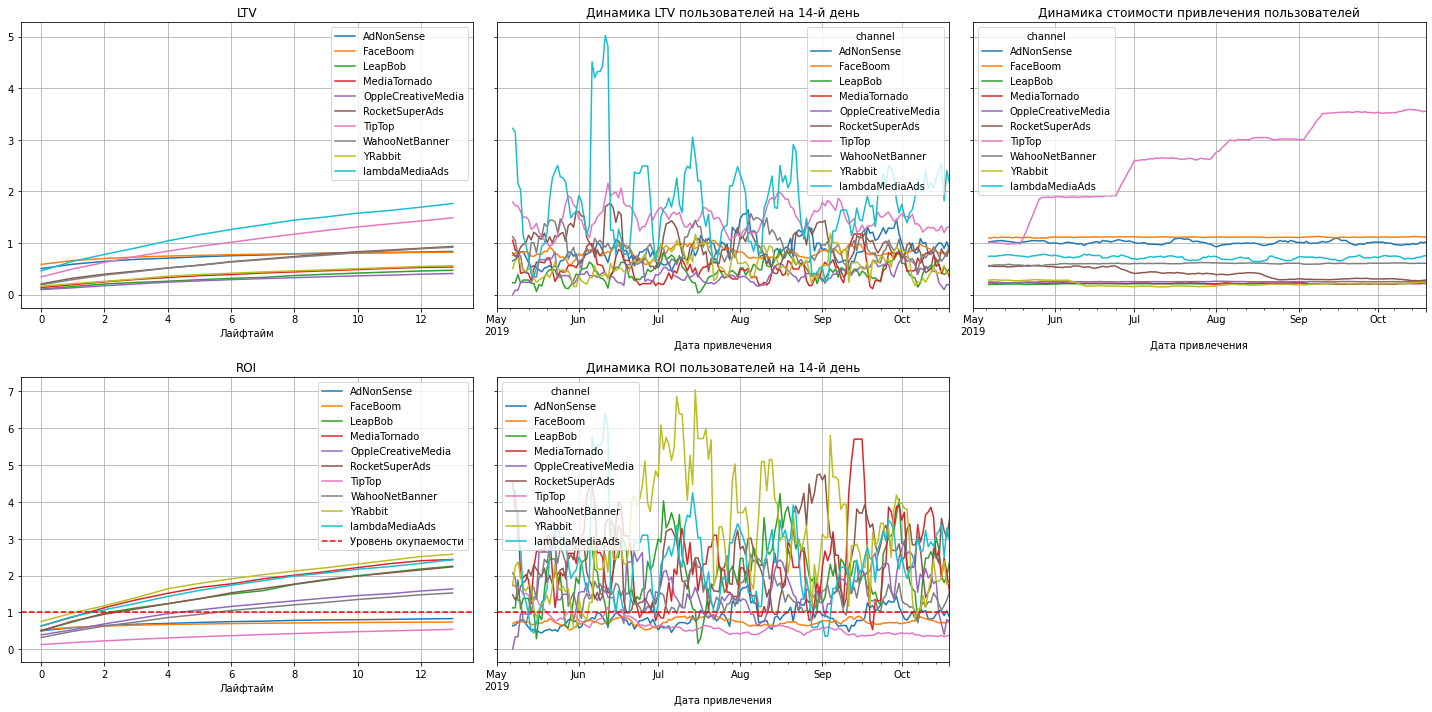

In [19]:

# считаем LTV и ROI с разбивкой по каналам
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv_2(
    profiles_2, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14,window=7)
# графики LTV, CAC и ROI

**По каналам привлечени есть интересные наблюдения: lambdaMediaAds лидирует по LTV, имея весьма высокий показатель доли платящих клиентов, причем только на 2 канала из списка уходит меньше рекламных средств. Результаты по LTV на 14-й день в июне у lambdaMediaAds были колоссальные, сильно опережающие другие каналы. По ROI здесь достигается окупаемость, что нельзя сказать про AdNonSense, FaceBoom и TipTop, который по LTV идет после lambdaMediaAds. Ужасный ROI у TipTop объясняется самым большим CAC, растущим скочками с июня. Несмотря на низкую отдачу, компания больше всего средств вкладывает именно в этот канал продвижения, у которого даже при большом объеме привлеченных клиентов нет экономической перспективы. YRabbit лидирует по ROI, особенно впериоде июль-август: CAC находится на низком уровне, однако по LTV ситуация удручающая, но на данный источник было потрачено меньше всего рекламных средств и делать жесткие выводы пока что рано. Аналогичная ситуация по MediaTornado с пиком ROI в сентябре.**

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Хочу акцентировать твоё внимание на способе решения в данном случае комплексной задачи - неокупаемость маркетинга. Мы эту составную проблему раскладываем на частные причины, декомпозируем весь трафик по странам, устройствам, регионам и ищем где конкретно и в какой момент случилась проблема. Опять же рекомендую здесь тоже использовать маркированный список) 
</div>

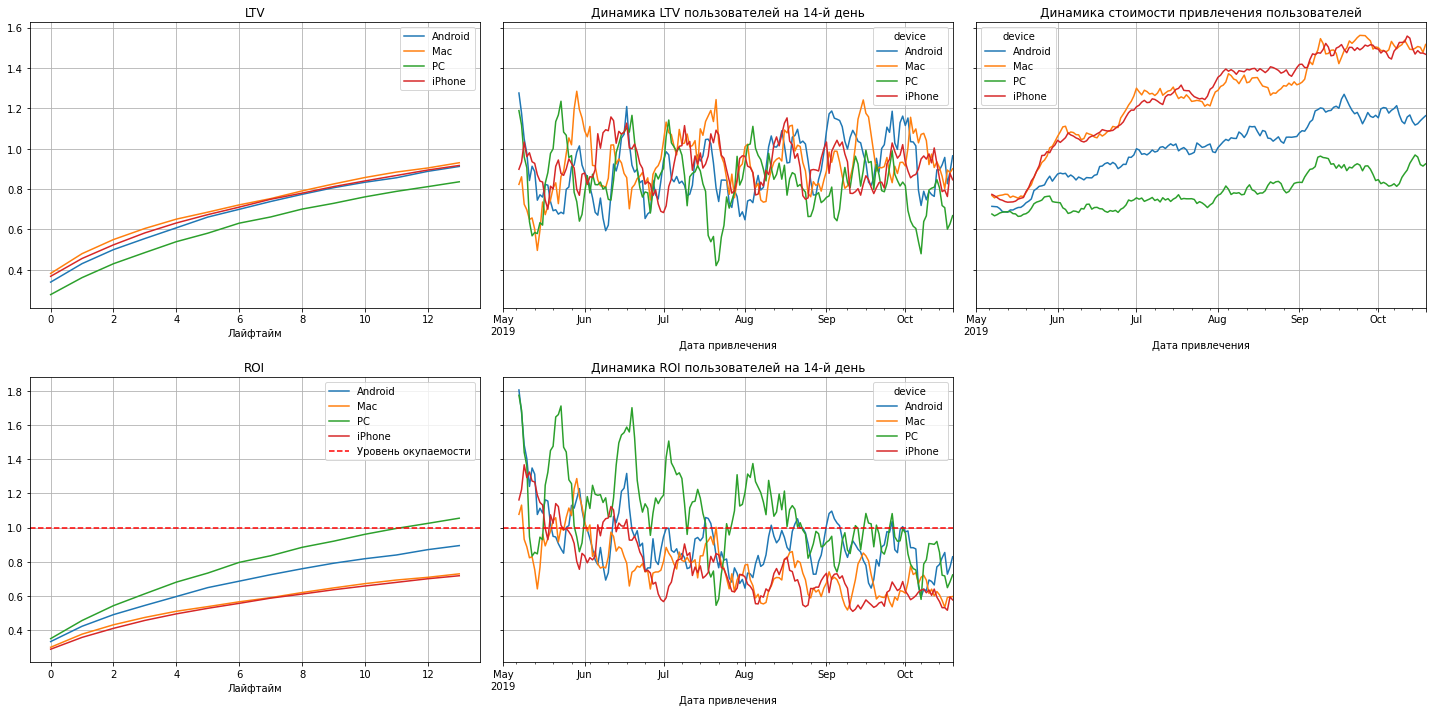

In [20]:
# считаем LTV и ROI с разбивкой по устройствам
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv_2(
    profiles_2, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14,window=7)
# графики LTV, CAC и ROI

**По устройствам заметно, как графики продукции компании Apple повторяют друг друга: здесь самый высокий показатель CAC и ROI ниже уровня окупаемости при наибольшем LTV. У данных устройств самая большая доля платящих клиентов. LTV пользователей PC самый низкий как и CAC, но еле-еле удается окупать рекламные расходы к 12-му лайфтайму и лидировать по ROI, особенно в динамике на 14-й день, где рекордные для выборки пики зафиксированы с мая по август. Android еще хуже движется к окупаемости, опережая по доли плательщиков только аутсайдера PC. LTV здесь в целом на равне с iPhone и Mac, поэтому имеет смысл уделить больше внимания пользователям с данным девайсом. Таким образом, PC и Android недооценены в рекламной стратегии.**

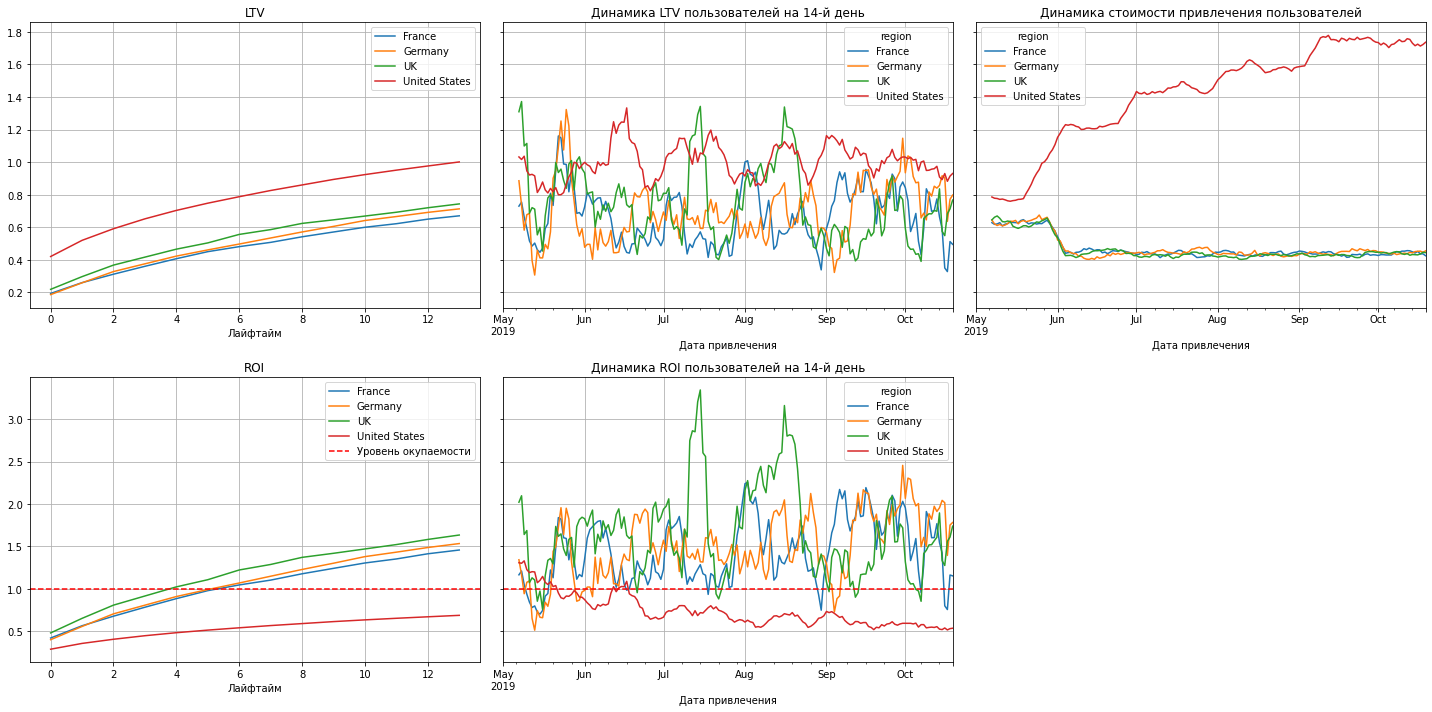

In [21]:
# считаем LTV и ROI с разбивкой по странам
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv_2(
    profiles_2, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14,window=7)
# графики LTV, CAC и ROI

**Американский регион с наибольшей долей платящих клиентов уверенно лидирует по LTV, однако из-за огромного CAC рекламные вложения не окупаются, что подтверждает худший показатель по ROI (с середины мая ROI пользователей на 14-й день ниже уровня окупаемости). Графики Германии и Великобритании схожи, как и доля плательщиков, при этом по ROI (в т.ч. на 14-й день) отмечаем опережающую динамику у UK, а по LTV отставание Германии не столь значительное. CAC у Франции, Германии и Великобритании в сравнение с США на весьма низком схожем уровне, что обеспечивает окупаемость рекламных расходов по данным странам к 6-му лайфтайму. Стоит отметить, что LTV и ROI у Франции самые низкие среди европейских стран как и доля платящих клиентов, поэтому компании лучше больше ориентироваться на Великобританию и Германию.**

 
<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Чудеса декомпозиции,  отличный подход, который всегда приведёт к успеху, разобрались с LTV И ROI, получили явную проблему в US и TIp Top с Faceboom, при учете, что US - страна с наибольшим количеством пользователей, а Tip TOp и FaceBoom - крупнешие каналы для нас это важные находки, дальше с которыми стоит работать</div>

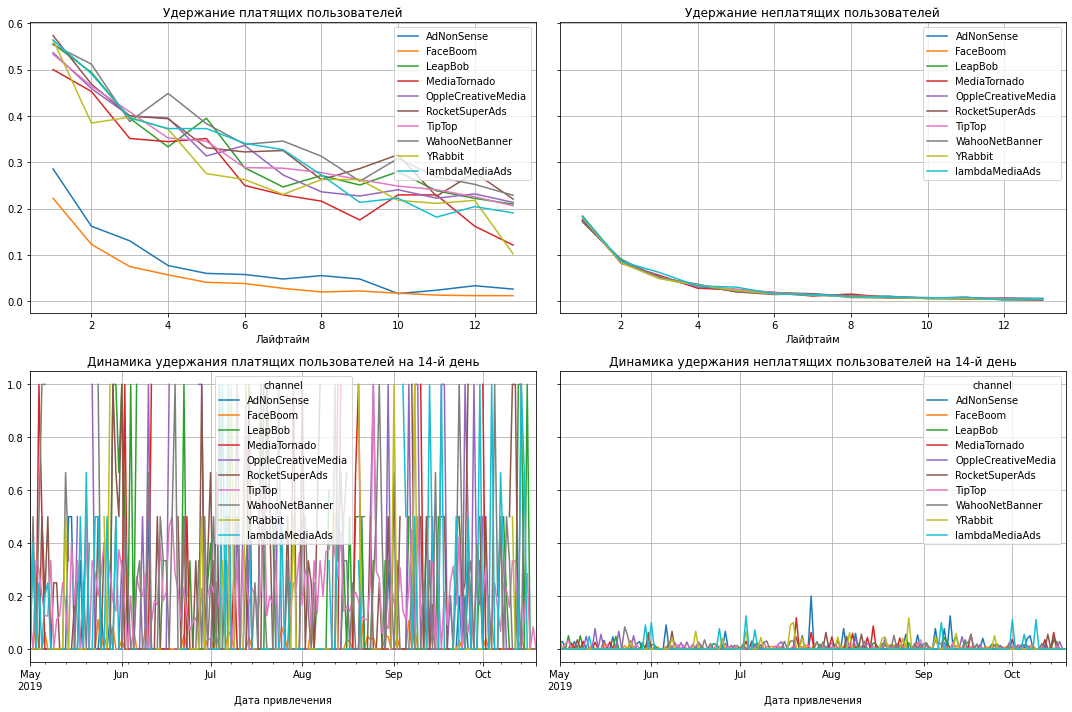

In [22]:
#графики удержания по каналам

retention_raw, retention, retention_history = get_retention(
    profiles_2, sessions, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

plot_retention(retention, retention_history, 14)

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Обрати внимание, что удержание неплатящих пользователей из разных каналов, стран, платформ ровное, а удержание платящих очень отличается, как считаешь почему так?
</div>


**На графике удержания платящих пользователей выделяется WahooNetBanner и RocketSuperAds: в течение 12 лайфтаймов общее удержание пользователей, привлеченных через данные каналы, выше. На пятый день «жизни» в лидеры по удержанию выходит lambdaMediaAds, но только до 8го лайфтайма. Худшие показатели удержания у FaceBoom и AdNonSense. Согласно второму графику, удержание неплатящих примерно одинаково для всех каналов.**

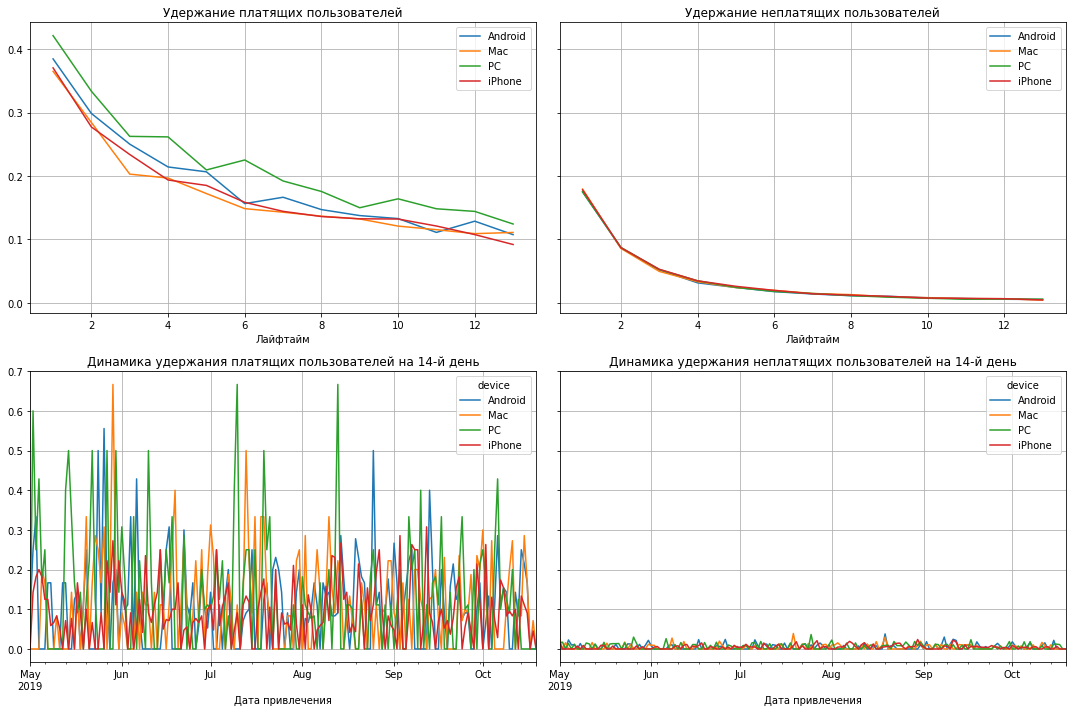

In [23]:
#графики удержания по девайсам

retention_raw, retention, retention_history = get_retention(
    profiles_2, sessions, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

plot_retention(retention, retention_history, 14)

**На графике удержания платящих пользователей выделяются пользователи PC: в течение 12 лайфтаймов общее удержание пользователей, привлеченных через PC наибольшее. На пятый день «жизни» конкуренцию составил Android, максимально приблизившись к лидеру. Худшие показатели удержания у Mac и iPhone, однако с 8го лайфтайма все устройства, кроме PC, демонстрируют примерно одинаковый уровень удержания. Согласно второму графику, удержание неплатящих одинаково для всех устройств.**

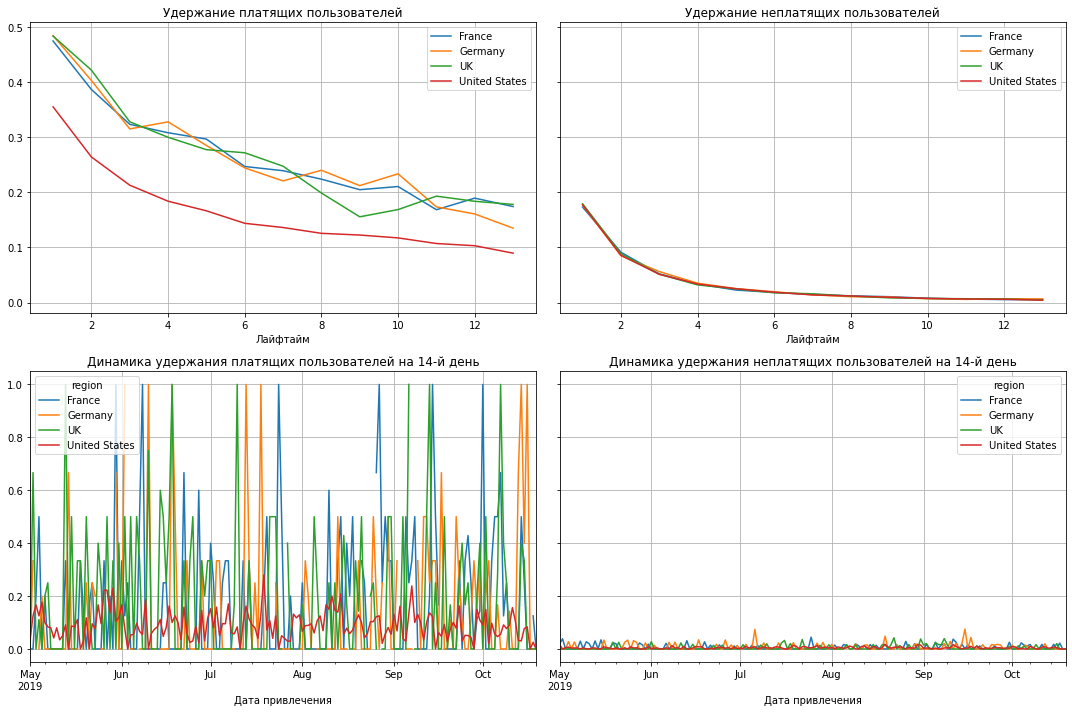

In [24]:
#графики удержания по регионам

retention_raw, retention, retention_history = get_retention(
    profiles_2, sessions, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

plot_retention(retention, retention_history, 14)

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Существенная проблема - плохое удержание в US, можно было подробнее посмотреть на всех ли каналах, которые приводят трафик в US, такая ситуация, анонсирую, что два самых крупных канала приводят трафик только из US, если захочешь, можешь поисследовать. Любопытно, что динамика конверсии `US` становится с течением времени не такой волатильной. </div>

**На графике удержания платящих пользователей выделяется United States с худшим показателем. По остальным странам динамика схожая, однако с 8 по 10 лайфтайм наблдается существенная просадка у UK. Выделить страну-лидера по удержанию крайне сложно, отметим пики у Германии на 8 и 10 лайфтаймах. Согласно второму графику, удержание неплатящих примерно одинаково для всех стран.**

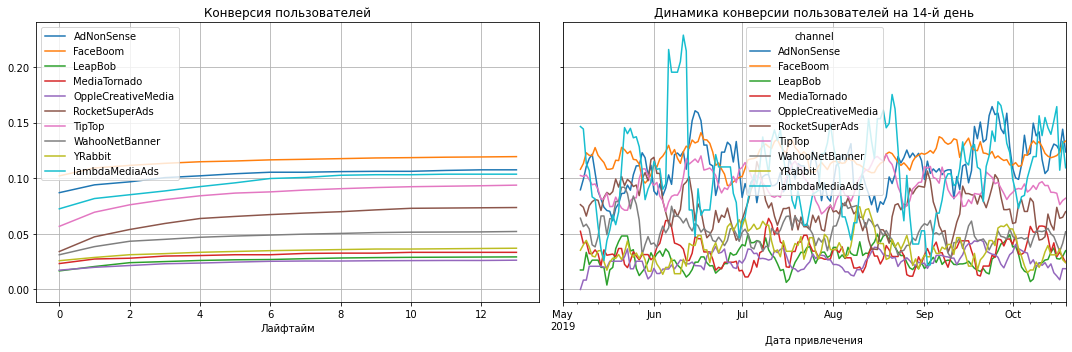

In [25]:
#графики конверсии по каналам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_2,
    orders,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['channel'],
)
plot_conversion(conversion, conversion_history, 14) 

**С точки зрения конверсии, сразу заметны лидирующие каналы: FaceBoom (из-за крупных вложений), AdNonSense, lambdaMediaAds и TipTop (аналогично FaceBoom). В качестве аутсайдеров обозначим Opple, LeapBob, MediaTornado, YRabbit. Здесь нужно обратить внимание, в первую очередь, на AdNonSense и lambdaMediaAds, каналы с большой долей платящих клиентов при небольших рекламных вложениях. Стоит ориентироваться на данные каналы, нежели на дорогие  FaceBoom и TipTop. В динамике конверсии заметны пики lambdaMediaAds с июня.**

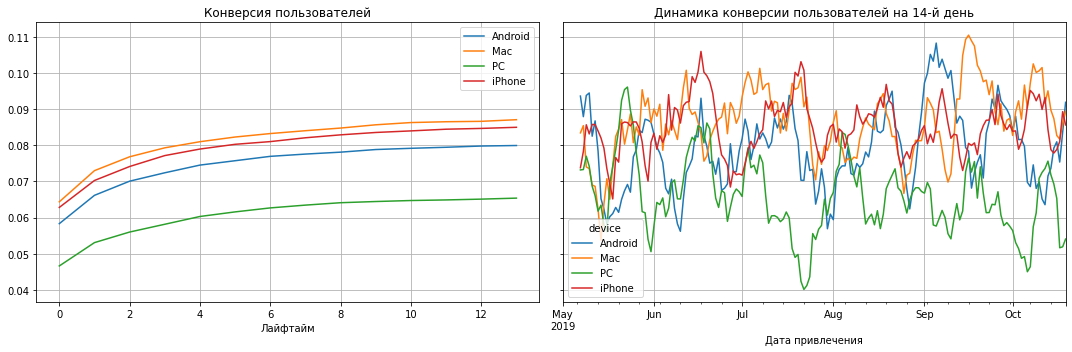

In [26]:
#графики конверсии по устройствам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_2,
    orders,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['device'],
)
plot_conversion(conversion, conversion_history, 14) 

**Конверсия пользователей Mac и iPhone наибольшая как и доля плательщиков на данных девайсах. По PC ситуация грустная, однако в динамике есть лидерство в мае и неплохой тренд в середине июня. Android в динамике смотрится привлекательно в начале сентября так же как и MAC чуть позднее. Таким образом, подчеркиваем потенциал Android вновь.**

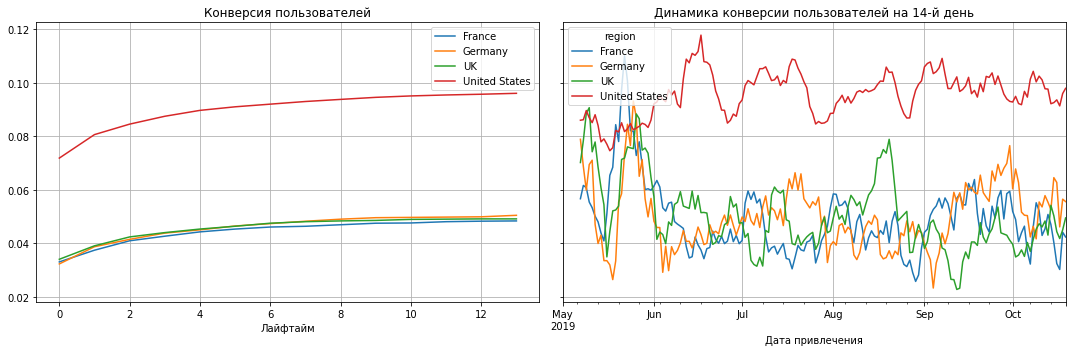

In [27]:
#графики конверсии по странам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_2,
    orders,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['region'],
)
plot_conversion(conversion, conversion_history, 14) 

**Конверсия пользователей из США наибольшая. Это неудивительно, учитывая количество пользователей из этого региона в выборке. Важным моментом является скользкий топ-2 по конверсии, закрепленный за Германией, которая смотрится крайне перспективно с учетом высокой доли платящих пользователей и ROI. Франция чуть отстает от Великобритании, но графики европейских стран схожи. В динамике отметим пик по UK в середине августа. США ожидаемо лидирует и в динамике.**

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Причины неэффективности привлечения пользователей:**
- неоправдано высокие расходы на рекламные каналы TipTop и FaceBoom (с отвратительным удержанием), в которых наибольший CAC при слабой отдаче.  
- только пользователи PC обеспечивают ситуацию, близкую к окупаемости по ROI
- крайне слабая окупаемость региона US при высоком CAC и слабом удержании
- низкая конверсия PC пользователей

**Рекомендации для отдела маркетинга:**

Необходимо перераспределение рекламных расходов. RocketSuperAds приносит более дешевого клиента, чем WahooNetBanner, а так же опережает данный канал по доле платящих клиентов на 2%, но вложения в RocketSuperAds в разы ниже - это нерационально. TipTop, хоть и имеет наибольшие рекламные расходы, привлекает наиболее дорогого клиента, похожая ситуация по FaceBoom - в данных каналах необходимо снизить рекламные вложения в пользу RocketSuperAds и lambdaMediaAds, каналы с большой долей платящих клиентов при небольших рекламных вложениях. AdNonSense уступает данным каналам по ROI и удержанию, поэтому ему приоритет не отдается в первую очередь. 

PC и Android недооценены в рекламной стратегии. Необходимо стараться привекать больше клиентов с данными устройствами, так как это экономически выгодно. Нарастив конверсию по PC, можно добиться больших успехов в общей статистике рекламной кампании.

Американский регион с наибольшей долей платящих клиентов уверенно лидирует по LTV, однако из-за огромного CAC рекламные вложения не окупаются, что подтверждает худший показатель по ROI (с середины июня ROI пользователей на 14-й день ниже уровня окупаемости). Великобритания демонстрирует опережающий для европейского региона LTV и ROI, поэтому необходимо в рекламной стратегии переключиться с США на UK. Германия также смотрится крайне перспективно с учетом высокой доли платящих пользователей и ROI. 


<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
* Отличная работа, все критические замечания исправлены, принимаю проект, ты молодец). Касательно рекомендаций, не хватает связи каналов и стран, ведь пользователь пришедший из `US` пришел с какого-то канала, вот этот кусочек пазла позволит получить общую картину. Ну и я считаю важной рекомендацией - чаще обращать внимания на показатели маркетинга, а то очень похоже, что маркетинговый отдел долгое время сжигал деньги не очень эффективно). В работе я оставил некоторое количество мелких рекомендаций от себя, надеюсь ты из них вынесешь что-то для себя и будешь активно применять в будущих проектах и работе.) Рекомендую поработать над оформлением теста `markdown` разметкой и особенно распространить оглавление, его можно сделать более подробным, что упростит навигацию по проекту, сейчас твоё оглавление выглядит так 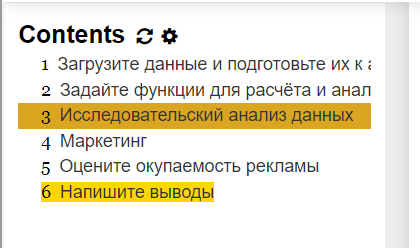
    
* О том, как **форматировать текст** в Markdown ячейке или как добавлять ссылки, ты можешь узнать [тут](https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet) и [вот тут](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd).
    
* В части по анализу графиков я оставил несколько вопросов, но так как проект я принимаю не хочу оставлять тебя без ответов. В более ровном удержании виновато число пользователей. Когда говорим об удержании платящих, видим величину волатильную, но это не из-за её природы, а из-за того, что наблюдений мало, и каждое отдельное наблюдение существенно влияет на оценку, такая особенность часто может проявляться в анализе, так что рекомендую проверять число наблюдений, чтобы не ошибаться с выводами.
   
* Сейчас работаю аналитиком в отделе закупки игровой компании и US это действительно наибольший рынок, ему достается процентов 30-40 всего трафика, да набор каналов существенно шире, но US доминирует в этом плане. Конечно у нас перед глазами набор дашбордов, которые позволяют контролировать множество всяких метрик, но периодически бывает всякое, конечно же масштабирование канала, который становится всё хуже и хуже - сомнительная идея, а оптимизации происходят существенно чаще, по некоторым каналам раз в неделю, а по некоторым и ещё чаще). Благодарю за совместную работу, желаю удачи!) 
    
</div>